In [2]:
import pandas as pd

In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) 


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'}, 'add

In [5]:
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
import bs4
from bs4 import BeautifulSoup   

In [5]:
import requests
response = requests.get(url="https://research.nvidia.com/graduate-fellowships/archive")
response.status_code

200

In [6]:
soup = BeautifulSoup(response.text, 'html.parser')

In [23]:
pf=soup.findAll("div", class_="archive-group")

In [24]:
pf[0]

<div class="archive-group">
<h4 class="archive-group__title">2021 Grad Fellows</h4>
<div class="views-row"><div class="views-field views-field-title"><span class="field-content">Alexander Sax</span></div><div class="views-field views-field-field-grad-fellow-institution"><div class="field-content">University of California, Berkeley</div></div></div>
<div class="views-row"><div class="views-field views-field-title"><span class="field-content">Hanrui Wang</span></div><div class="views-field views-field-field-grad-fellow-institution"><div class="field-content">Massachusetts Institute of Technology</div></div></div>
<div class="views-row"><div class="views-field views-field-title"><span class="field-content">Ji Lin</span></div><div class="views-field views-field-field-grad-fellow-institution"><div class="field-content">Massachusetts Institute of Technology</div></div></div>
<div class="views-row"><div class="views-field views-field-title"><span class="field-content">Krishna Murthy Jatavalla

In [29]:
title = pf[0].find("h4", class_="archive-group__title").get_text(strip=True)
print(title)

2021 Grad Fellows


In [42]:
import seaborn as sns

In [33]:
import pandas as pd

# Initialize an empty list to hold the data
data = []

# Iterate over each archive-group
for group in pf:
    # Extract the year
    year = group.find(
        "h4", class_="archive-group__title"
        ).get_text(strip=True).split()[0]
    
    # Find all fellows in this group
    fellows = group.find_all("div", class_="views-row")
    
    for fellow in fellows:
        # Extract name and university
        name = fellow.find(
            "div", class_="views-field-title"
            ).get_text(strip=True)
        university = fellow.find(
            "div", class_="views-field-field-grad-fellow-institution"
            ).get_text(strip=True)
        
        # Append to the data list
        data.append({"Name": name, "Year": year, "University": university})

# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df.head()


,Name,Year,University
0,Alexander Sax,2021,"University of California, Berkeley"
1,Hanrui Wang,2021,Massachusetts Institute of Technology
2,Ji Lin,2021,Massachusetts Institute of Technology
3,Krishna Murthy Jatavallabhula,2021,University of Montreal
4,Rohan Sawhney,2021,Carnegie Mellon University


In [35]:
# Get basic information about the DataFrame
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Summary statistics (mainly for numeric columns)
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        181 non-null    object
 1   Year        181 non-null    object
 2   University  181 non-null    object
dtypes: object(3)
memory usage: 4.4+ KB
None
Name          0
Year          0
University    0
dtype: int64
                Name  Year           University
count            181   181                  181
unique           157    20                   55
top     Greg Johnson  2006  Stanford University
freq               3    12                   24


In [38]:
# Count the number of fellows each year and sort in descending order
import pandas as pd

# Count the number of fellows each year
year_counts = df['Year'].value_counts()

# Sort the years in descending order of their counts
sorted_years = year_counts.sort_index(ascending=False)
print(sorted_years)



Year
2021    10
2020     5
2019    10
2018    11
2017    11
2016     6
2015     7
2014     5
2013    11
2012    11
2011    11
2010     9
2009    10
2008    10
2007    11
2006    12
2005     8
2004     7
2003    10
2002     6
Name: count, dtype: int64


In [48]:
year_counts = df['Year'].value_counts().sort_values(ascending=False)

# Create a DataFrame where years are columns and counts are values in the next row
data = {
    'Year': year_counts.index,
    'Count': year_counts.values
}

# Create the DataFrame
df_year_counts = pd.DataFrame(data)

# Transpose the DataFrame and reset index to get years as columns
df_transposed = df_year_counts.set_index('Year').T

# Display the DataFrame
print(df_transposed)

Year   2006  2018  2017  2007  2013  2012  2011  2008  2019  2021  2003  2009  \
Count    12    11    11    11    11    11    11    10    10    10    10    10   

Year   2010  2005  2015  2004  2016  2002  2020  2014  
Count     9     8     7     7     6     6     5     5  


In [40]:
# Count the number of fellows from each university
university_counts = df['University'].value_counts()
print(university_counts)  # Display the top 10 universities


University
Stanford University                                 24
Massachusetts Institute of Technology               15
University of California, Berkeley                  14
Carnegie Mellon University                          13
University of Utah                                  10
University of Washington                             9
University of Illinois, Urbana-Champaign             9
University of California, Davis                      8
Georgia Institute of Technology                      8
University of North Carolina, Chapel Hill            6
University of Texas, Austin                          4
Harvard University                                   4
Clemson University                                   3
University of Michigan                               3
New York University                                  2
University of Virginia                               2
University of Edinburgh                              2
University of Toronto                                2

In [44]:
import matplotlib.pyplot as plt

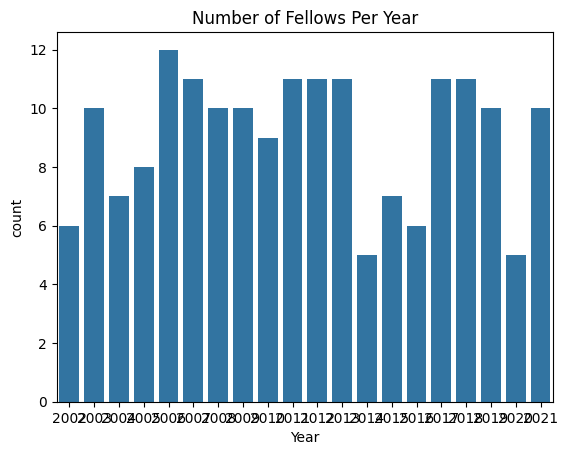

In [45]:
sns.countplot(x='Year', data=df, order=sorted(df['Year'].unique()))
plt.title('Number of Fellows Per Year')
plt.show()

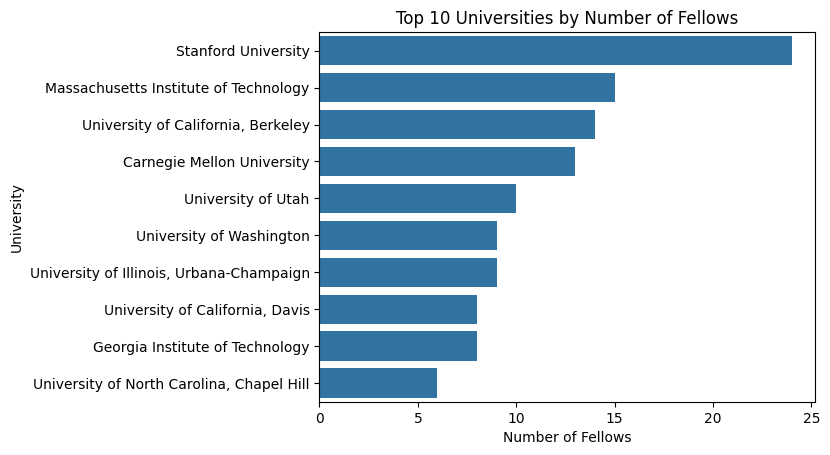

In [46]:
# Plot the top 10 universities with the most fellows
top_universities = df['University'].value_counts().head(10)
sns.barplot(y=top_universities.index, x=top_universities.values)
plt.title('Top 10 Universities by Number of Fellows')
plt.xlabel('Number of Fellows')
plt.ylabel('University')
plt.show()

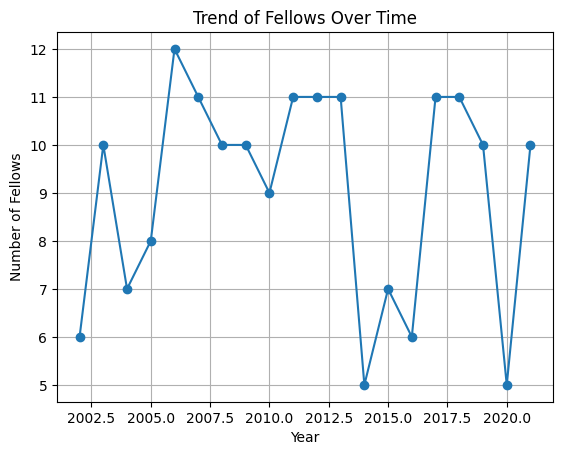

In [47]:
# Plot the trend of fellows over time
df['Year'] = df['Year'].astype(int)  # Ensure the Year column is integer type
yearly_trend = df.groupby('Year').size()
yearly_trend.plot(kind='line', marker='o')
plt.title('Trend of Fellows Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Fellows')
plt.grid(True)
plt.show()